## Projeto 3: Modelagem da aceleração do Tesla S Plaid:


### Perguntas a serem respondidas com gráficos conclusivos:

 - Quanto tempo demora para atingir 200 km/h em função da massa dentro do carro?

In [2]:
# Importações necessárias:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

### Dados da Validação (Velocidade e Aceleração):

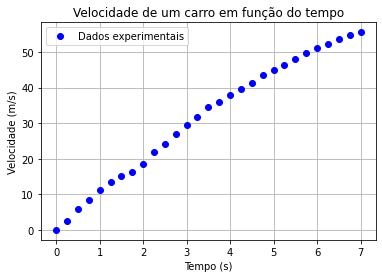

In [3]:
# Link do vídeo: https://www.youtube.com/watch?v=bpLRQdB76fw (Minuto 2:14 - 2:32)
dt = 1
velocidade_kmh = [0,9,21,30,40,48,55,59,67,79,87,97,106,114,124,129,136,143,149,157,162,167,173,179,184,188,193,197,200]
velocidade_ms = []

# Conversão de km/h para m/s
for i in range(len(velocidade_kmh)):
    velocidade_ms.append(velocidade_kmh[i]/3.6)

# Lista tempo
tempo = np.arange(0, len(velocidade_ms), dt)
    
# Plotagem do gráfico
plt.plot(tempo/4, velocidade_ms, 'bo', label='Dados experimentais')
plt.xlabel("Tempo (s)")
plt.ylabel("Velocidade (m/s)")
plt.title("Velocidade de um carro em função do tempo")
plt.legend()
plt.grid()
plt.show()

### Dados para a modelagem:

In [4]:
# Dados do meio:
g = 9.807                   # Gravidade da Terra (m/s²)
ro = 1.2754                 # Densidade do ar (kg/m³)

# Dados do carro:
massa = 2237                # Massa (kg)
a_frontal = 2.34            # Área frontal (m²)
c_drag = 0.208              # Coeficiente de arrasto (adimensional)
raio_r = 0.352              # Raio da roda (m) 
gear_ratio = 7.5            # Relação de marcha (adimensional)
pot_max = 201000            # Potência máxima (W)

### Condições iniciais e lista tempo:

In [5]:
x0 = 0                          # Posição inicial (m)
vx0 = 0                         # Velocidade inicial (m/s)

# Lista de condições iniciais
inicial = [x0, vx0]

# Lista tempo
dt = 1e-3                       # Intervalo de tempo (s)
lista_t = np.arange(0, 12, dt)   # Tempo (s)

### Implementação:


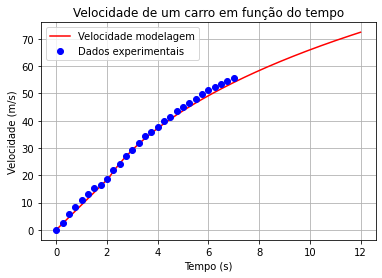

In [6]:
# Equações diferenciais:

# Torque:
T_max = 320

def torque(v):
    if v < 18.77:
        T = T_max
    else:
        T = pot_max / (v/raio_r * gear_ratio)
    return T

# Modelo do carro:
def modelo(inicial, t):
    x = inicial[0]
    vx = inicial[1]

    drag = 0.5 * ro * a_frontal * c_drag * vx**2
    t = 3 * (torque(vx) / raio_r) * gear_ratio

    dxdt = vx
    dvxdt = (t - drag)/massa

    return [dxdt, dvxdt]

# Odeint:
solucao = odeint(modelo, inicial, lista_t)

# Gráfico:
plt.plot(lista_t, solucao[:, 1], 'r', label='Velocidade modelagem')
plt.plot(tempo/4, velocidade_ms, 'bo', label='Dados experimentais')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade de um carro em função do tempo')
plt.legend()
plt.grid()
plt.show()

### Gráficos conclusivos:

- Qual é a relação entre a massa dentro do carro e o tempo para chegar na velocidade de 200km/h?

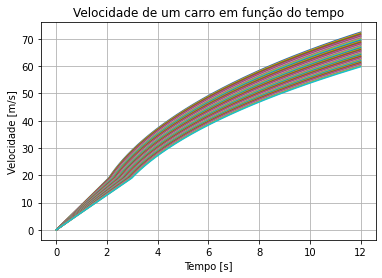

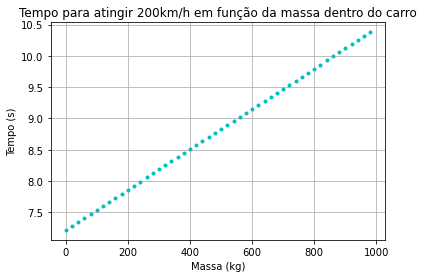

In [7]:
massas = np.arange(2237, 2237+1000, 20)
tempos_finais = []

def modelo_conclusivo(inicial, t, massa):
    x = inicial[0]
    vx = inicial[1]

    drag = 0.5 * ro * a_frontal * c_drag * vx**2
    t = 3 * (torque(vx) / raio_r) * gear_ratio

    dxdt = vx
    dvxdt = (t - drag)/massa

    return [dxdt, dvxdt]

for i in range(len(massas)):
    massa = massas[i]
    x0 = 0
    vx0 = 0

    inicial = [x0, vx0]

    solucao = odeint(modelo_conclusivo, inicial, lista_t, args=(massa,))
    plt.plot(lista_t, solucao[:, 1], label = 'Massa = ' + str(massa) + ' kg')

    velocidades = solucao[:, 1]
    for j in range(len(velocidades)):
        if velocidades[j] >= 55:
            tempos_finais.append(lista_t[j])
            break

# Plota o gráfico das simulações  
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade [m/s]')
plt.title('Velocidade de um carro em função do tempo')
plt.grid()
plt.show()

plt.plot(massas-2237, tempos_finais, 'c.')
plt.xlabel('Massa (kg)')
plt.ylabel('Tempo (s)')
plt.title('Tempo para atingir 200km/h em função da massa dentro do carro')
plt.grid()
plt.show()